# Classification Notebook

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

## Working with All features

### Loading & Preprocessing Dataset

In [2]:
full_dataset = pd.read_csv('../data/all_features_data.csv')
full_dataset.sample(10)

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate,RiskLevel
695,29,130,70,7.7,98.0,78,Mid
312,21,90,60,6.9,98.0,86,Mid
537,20,100,90,7.5,98.0,88,Mid
543,40,120,95,11.0,98.0,80,High
86,16,100,70,6.9,98.0,80,Mid
258,55,140,95,19.0,98.0,77,High
796,18,120,80,6.9,102.0,76,Mid
57,23,90,60,6.4,98.0,76,Low
904,17,85,60,9.0,102.0,86,High
510,35,100,70,7.5,98.0,66,Low


In [3]:
X = full_dataset.drop(columns=['RiskLevel'])
y = full_dataset['RiskLevel']

In [4]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
le = preprocessing.LabelEncoder()
le.fit(y_train)

LabelEncoder()

### Models

In [7]:
models = {
    "Softmax Regression": LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5, random_state=42), n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.05, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, verbose=0, random_state=42)
}

========== Softmax Regression ==========

Test Accuracy: 0.5775
Classification Report:
              precision    recall  f1-score   support

        High       0.70      0.67      0.68        39
         Low       0.63      0.70      0.66        84
         Mid       0.41      0.36      0.38        64

    accuracy                           0.58       187
   macro avg       0.58      0.58      0.58       187
weighted avg       0.57      0.58      0.57       187



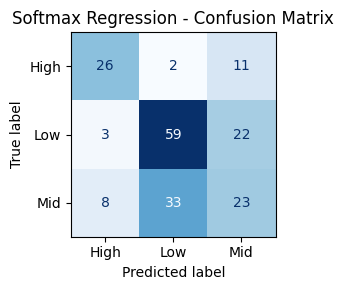

========== KNN ==========

Test Accuracy: 0.5829
Classification Report:
              precision    recall  f1-score   support

        High       0.60      0.69      0.64        39
         Low       0.64      0.62      0.63        84
         Mid       0.49      0.47      0.48        64

    accuracy                           0.58       187
   macro avg       0.58      0.59      0.58       187
weighted avg       0.58      0.58      0.58       187



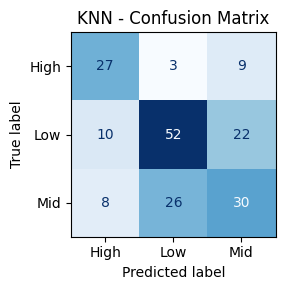

========== Naive Bayes ==========

Test Accuracy: 0.5722
Classification Report:
              precision    recall  f1-score   support

        High       0.74      0.64      0.68        39
         Low       0.60      0.80      0.68        84
         Mid       0.37      0.23      0.29        64

    accuracy                           0.57       187
   macro avg       0.57      0.56      0.55       187
weighted avg       0.55      0.57      0.55       187



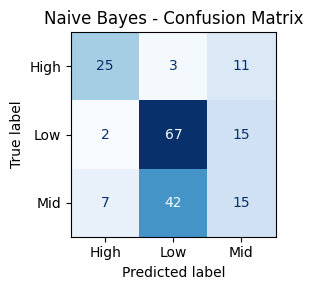

========== Decision Tree ==========

Test Accuracy: 0.6043
Classification Report:
              precision    recall  f1-score   support

        High       0.71      0.69      0.70        39
         Low       0.64      0.79      0.71        84
         Mid       0.43      0.31      0.36        64

    accuracy                           0.60       187
   macro avg       0.60      0.60      0.59       187
weighted avg       0.58      0.60      0.59       187



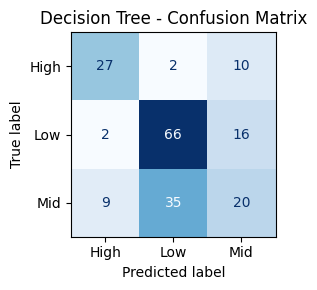

========== Random Forest ==========

Test Accuracy: 0.6310
Classification Report:
              precision    recall  f1-score   support

        High       0.76      0.72      0.74        39
         Low       0.65      0.81      0.72        84
         Mid       0.49      0.34      0.40        64

    accuracy                           0.63       187
   macro avg       0.63      0.62      0.62       187
weighted avg       0.62      0.63      0.62       187



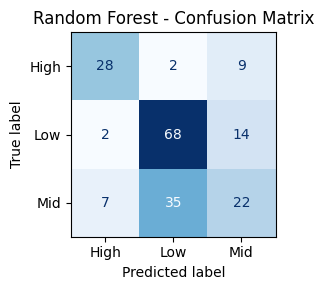

========== AdaBoost ==========

Test Accuracy: 0.7914
Classification Report:
              precision    recall  f1-score   support

        High       0.75      0.85      0.80        39
         Low       0.81      0.82      0.82        84
         Mid       0.79      0.72      0.75        64

    accuracy                           0.79       187
   macro avg       0.78      0.80      0.79       187
weighted avg       0.79      0.79      0.79       187



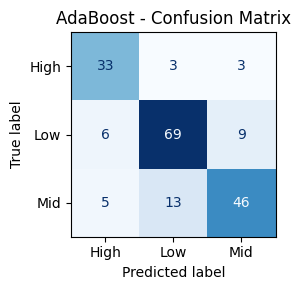

========== Gradient Boosting ==========

Test Accuracy: 0.8128
Classification Report:
              precision    recall  f1-score   support

        High       0.81      0.74      0.77        39
         Low       0.89      0.85      0.87        84
         Mid       0.73      0.81      0.77        64

    accuracy                           0.81       187
   macro avg       0.81      0.80      0.80       187
weighted avg       0.82      0.81      0.81       187



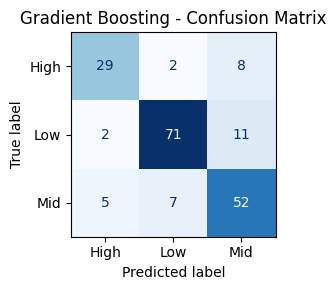

========== SVM ==========

Test Accuracy: 0.6043
Classification Report:
              precision    recall  f1-score   support

        High       0.63      0.69      0.66        39
         Low       0.64      0.76      0.70        84
         Mid       0.50      0.34      0.41        64

    accuracy                           0.60       187
   macro avg       0.59      0.60      0.59       187
weighted avg       0.59      0.60      0.59       187



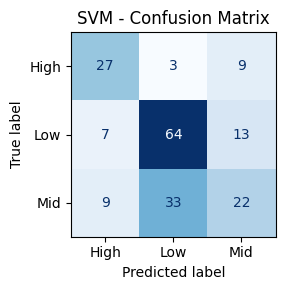

========== XGBoost ==========

Test Accuracy: 0.8235
Classification Report:
              precision    recall  f1-score   support

        High       0.78      0.79      0.78        39
         Low       0.89      0.85      0.87        84
         Mid       0.78      0.81      0.79        64

    accuracy                           0.82       187
   macro avg       0.81      0.82      0.81       187
weighted avg       0.83      0.82      0.82       187



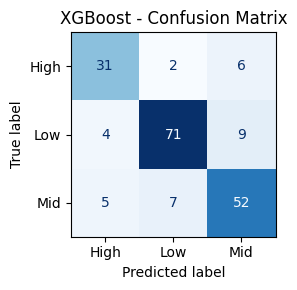

========== CatBoost ==========

Test Accuracy: 0.6738
Classification Report:
              precision    recall  f1-score   support

        High       0.77      0.77      0.77        39
         Low       0.70      0.76      0.73        84
         Mid       0.56      0.50      0.53        64

    accuracy                           0.67       187
   macro avg       0.68      0.68      0.68       187
weighted avg       0.67      0.67      0.67       187



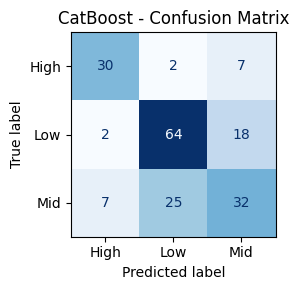

In [8]:
results = {}
for name, model in models.items():
    print(f"========== {name} ==========\n")
    if name in ["XGBoost", "CatBoost"]:
        model.fit(X_train, le.transform(y_train))
        y_pred_encoded = model.predict(X_test)
        y_pred = le.inverse_transform(y_pred_encoded)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Test Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    fig, ax = plt.subplots(figsize=(3,3))  
    disp.plot(ax=ax,cmap="Blues", colorbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.tight_layout()
    plt.show()


In [9]:
print("========== Model Summaries ==========\n")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

========== Model Summaries ==========

Softmax Regression: 0.5775
KNN: 0.5829
Naive Bayes: 0.5722
Decision Tree: 0.6043
Random Forest: 0.6310
AdaBoost: 0.7914
Gradient Boosting: 0.8128
SVM: 0.6043
XGBoost: 0.8235
CatBoost: 0.6738


#### Hyperparameter Tuning

In [10]:
params = {
    "Softmax Regression": {
        'C': [0.01, 0.05, 0.1, 0.5, 1, 10]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9, 11, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Naive Bayes": {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    },
    "Decision Tree": {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 3, 4],
        'criterion': ['gini', 'entropy']
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 3, 4],
        'bootstrap': [True, False]
    },
    "AdaBoost": {
        'n_estimators': [100, 200, 300, 500],
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
        'subsample': [0.8, 1.0]
    },
    "SVM": {
        'C': [0.1, 0.5, 1, 5, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [0, 3, 5, 7, 10],
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    "CatBoost": {
        'n_estimators': [100, 200, 300, 500],
        'learning_rate': [0.005, 0.01, 0.05, 0.1],
        'max_depth': [2, 4, 6, 8, 10]
    }
}

In [11]:
tuning_results = {}
for model_name, model_params in params.items():
    print(f"\n======================================== {model_name} ========================================")
    model = models[model_name]
    grid = GridSearchCV(
        estimator = models[model_name],
        param_grid = model_params,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    if model_name in ["XGBoost", "CatBoost"]:
        grid.fit(X_train, le.transform(y_train))
        best_model = grid.best_estimator_
        y_pred_encoded = best_model.predict(X_test)
        y_pred = le.inverse_transform(y_pred_encoded)
    else:
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)
    print("Best Params:", grid.best_params_)
    print("Best CV Score:", grid.best_score_)
    accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy of Best Model:", accuracy)
    tuning_results[model_name] = {
        'Best Params':grid.best_params_, 
        'Best Test Accuracy': accuracy
    }


======================================== Softmax Regression ========================================
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params: {'C': 0.05}
Best CV Score: 0.651042505592841
Test Accuracy of Best Model: 0.6042780748663101

======================================== KNN ========================================
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Params: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best CV Score: 0.8101118568232663
Test Accuracy of Best Model: 0.8021390374331551

======================================== Naive Bayes ========================================
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params: {'var_smoothing': 1e-07}
Best CV Score: 0.6189440715883668
Test Accuracy of Best Model: 0.5721925133689839

======================================== Decision Tree ========================================
Fitting 5 folds for each of 120 candidates, totalli

In [12]:
print("============================== Hyperparameter Tuning Summaries ==============================")
for name, tuning in tuning_results.items():
    print(f"\n=========={name}==========")
    for key, val in tuning.items():
        print(f"{key}: {val}")


============================== Hyperparameter Tuning Summaries ==============================

==========Softmax Regression==========
Best Params: {'C': 0.05}
Best Test Accuracy: 0.6042780748663101

==========KNN==========
Best Params: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best Test Accuracy: 0.8021390374331551

==========Naive Bayes==========
Best Params: {'var_smoothing': 1e-07}
Best Test Accuracy: 0.5721925133689839

==========Decision Tree==========
Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Test Accuracy: 0.8128342245989305

==========Random Forest==========
Best Params: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Test Accuracy: 0.8235294117647058

==========AdaBoost==========
Best Params: {'learning_rate': 0.1, 'n_estimators': 500}
Best Test Accuracy: 0.786096256684492

==========Gradient Boosting==========
Best Params: {'le

## Working with Few Features

### Loading & Preprocessing Dataset

In [13]:
small_dim_dataset = pd.read_csv('../data/few_features_data.csv')
small_dim_dataset

,Age,SystolicBP,BloodSugar,RiskLevel
0,25,130,15.0,High
1,35,140,13.0,High
2,29,90,8.0,High
3,30,140,7.0,High
4,35,120,6.1,Low
...,...,...,...,...
933,17,90,7.7,High
934,17,85,6.3,High
935,40,120,7.7,High
936,48,120,11.0,High


In [14]:
X = small_dim_dataset.drop(columns=['RiskLevel'])
y = small_dim_dataset['RiskLevel']

In [15]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
le = preprocessing.LabelEncoder()
le.fit(y_train)

LabelEncoder()

### Models

In [17]:
models_small = {
    "Softmax Regression": LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5, random_state=42), n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.05, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, verbose=0, random_state=42)
}

========== Softmax Regression ==========

Test Accuracy: 0.4787
Classification Report:
              precision    recall  f1-score   support

        High       0.79      0.39      0.53        38
         Low       0.51      0.58      0.54        81
         Mid       0.37      0.41      0.39        69

    accuracy                           0.48       188
   macro avg       0.55      0.46      0.48       188
weighted avg       0.51      0.48      0.48       188



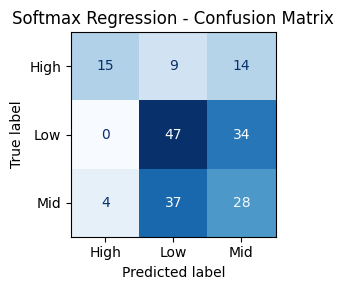

========== KNN ==========

Test Accuracy: 0.7234
Classification Report:
              precision    recall  f1-score   support

        High       0.84      0.71      0.77        38
         Low       0.72      0.81      0.76        81
         Mid       0.67      0.62      0.65        69

    accuracy                           0.72       188
   macro avg       0.74      0.72      0.73       188
weighted avg       0.73      0.72      0.72       188



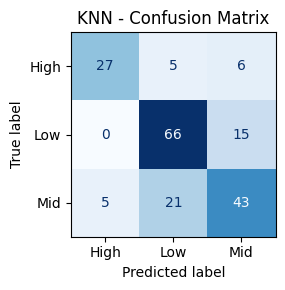

========== Naive Bayes ==========

Test Accuracy: 0.5479
Classification Report:
              precision    recall  f1-score   support

        High       0.79      0.39      0.53        38
         Low       0.53      0.98      0.68        81
         Mid       0.47      0.13      0.20        69

    accuracy                           0.55       188
   macro avg       0.60      0.50      0.47       188
weighted avg       0.56      0.55      0.48       188



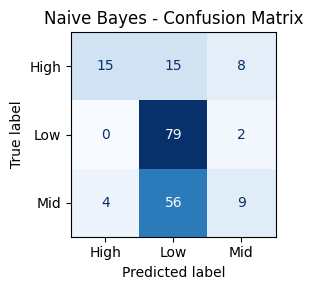

========== Decision Tree ==========

Test Accuracy: 0.6862
Classification Report:
              precision    recall  f1-score   support

        High       0.90      0.68      0.78        38
         Low       0.74      0.62      0.67        81
         Mid       0.58      0.77      0.66        69

    accuracy                           0.69       188
   macro avg       0.74      0.69      0.70       188
weighted avg       0.71      0.69      0.69       188



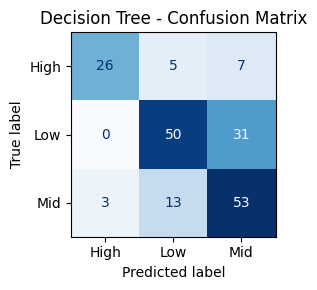

========== Random Forest ==========

Test Accuracy: 0.7447
Classification Report:
              precision    recall  f1-score   support

        High       0.85      0.76      0.81        38
         Low       0.67      0.91      0.77        81
         Mid       0.84      0.54      0.65        69

    accuracy                           0.74       188
   macro avg       0.79      0.74      0.75       188
weighted avg       0.77      0.74      0.74       188



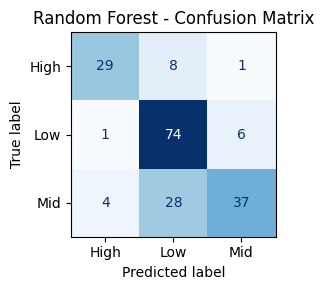

========== AdaBoost ==========

Test Accuracy: 0.8032
Classification Report:
              precision    recall  f1-score   support

        High       0.91      0.82      0.86        38
         Low       0.79      0.86      0.82        81
         Mid       0.77      0.72      0.75        69

    accuracy                           0.80       188
   macro avg       0.82      0.80      0.81       188
weighted avg       0.81      0.80      0.80       188



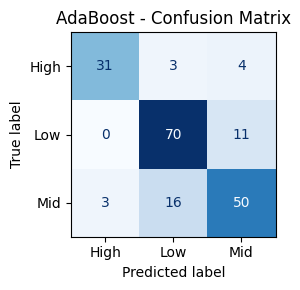

========== Gradient Boosting ==========

Test Accuracy: 0.7926
Classification Report:
              precision    recall  f1-score   support

        High       0.91      0.79      0.85        38
         Low       0.78      0.81      0.80        81
         Mid       0.76      0.77      0.76        69

    accuracy                           0.79       188
   macro avg       0.81      0.79      0.80       188
weighted avg       0.80      0.79      0.79       188



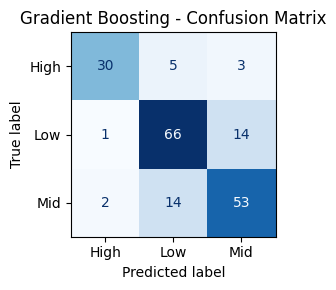

========== SVM ==========

Test Accuracy: 0.6489
Classification Report:
              precision    recall  f1-score   support

        High       0.86      0.63      0.73        38
         Low       0.57      0.98      0.72        81
         Mid       0.86      0.28      0.42        69

    accuracy                           0.65       188
   macro avg       0.76      0.63      0.62       188
weighted avg       0.74      0.65      0.61       188



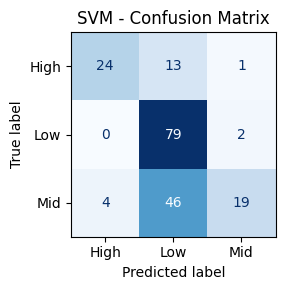

========== XGBoost ==========

Test Accuracy: 0.8191
Classification Report:
              precision    recall  f1-score   support

        High       0.91      0.82      0.86        38
         Low       0.82      0.84      0.83        81
         Mid       0.77      0.80      0.79        69

    accuracy                           0.82       188
   macro avg       0.84      0.82      0.83       188
weighted avg       0.82      0.82      0.82       188



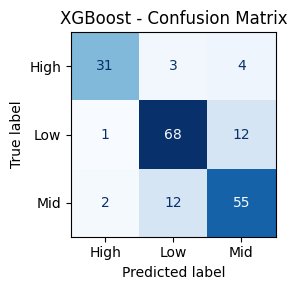

========== CatBoost ==========

Test Accuracy: 0.6915
Classification Report:
              precision    recall  f1-score   support

        High       0.76      0.76      0.76        38
         Low       0.65      0.86      0.74        81
         Mid       0.72      0.45      0.55        69

    accuracy                           0.69       188
   macro avg       0.71      0.69      0.69       188
weighted avg       0.70      0.69      0.68       188



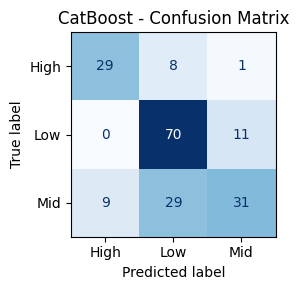

========== Model Summaries ==========

Softmax Regression: 0.4787
KNN: 0.7234
Naive Bayes: 0.5479
Decision Tree: 0.6862
Random Forest: 0.7447
AdaBoost: 0.8032
Gradient Boosting: 0.7926
SVM: 0.6489
XGBoost: 0.8191
CatBoost: 0.6915


In [18]:
results_small = {}
for name, model in models_small.items():
    print(f"========== {name} ==========\n")
    if name in ["XGBoost", "CatBoost"]:
        model.fit(X_train, le.transform(y_train))
        y_pred_encoded = model.predict(X_test)
        y_pred = le.inverse_transform(y_pred_encoded)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_small[name] = accuracy
    print(f"Test Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    fig, ax = plt.subplots(figsize=(3,3))  
    disp.plot(ax=ax,cmap="Blues", colorbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.tight_layout()
    plt.show()

print("========== Model Summaries ==========\n")
for name, acc in results_small.items():
    print(f"{name}: {acc:.4f}")

#### Hyperparameter Tuning

In [19]:
params_small = {
    "Softmax Regression": {
        'C': [0.01, 0.1, 1, 10]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Naive Bayes": {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    },
    "Decision Tree": {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    "AdaBoost": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.001, 0.01, 0.1]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5],
        'learning_rate': [0.001, 0.01, 0.1],
        'subsample': [0.8, 1.0]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'max_depth': [0, 3, 5],
        'learning_rate': [0.001, 0.01, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    "CatBoost": {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [4, 6, 8]
    }
}

In [20]:
tuning_results_small = {}
for model_name, model_params in params_small.items():
    print(f"\n======================================== {model_name} ========================================")
    model = models[model_name]
    grid = GridSearchCV(
        estimator = model,
        param_grid = model_params,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    if model_name in ["XGBoost", "CatBoost"]:
        grid.fit(X_train, le.transform(y_train))
        best_model = grid.best_estimator_
        y_pred_encoded = best_model.predict(X_test)
        y_pred = le.inverse_transform(y_pred_encoded)
    else:
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)
    print("Best Params:", grid.best_params_)
    print("Best CV Score:", grid.best_score_)
    accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy of Best Model:", accuracy)
    tuning_results_small[model_name] = {
        'Best Params':grid.best_params_, 
        'Best Test Accuracy': accuracy
    }


======================================== Softmax Regression ========================================
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params: {'C': 0.01}
Best CV Score: 0.56
Test Accuracy of Best Model: 0.5053191489361702

======================================== KNN ========================================
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Best CV Score: 0.792
Test Accuracy of Best Model: 0.8031914893617021

======================================== Naive Bayes ========================================
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params: {'var_smoothing': 1e-09}
Best CV Score: 0.5666666666666667
Test Accuracy of Best Model: 0.5478723404255319

======================================== Decision Tree ========================================
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Params: {

In [21]:
print("============================== Hyperparameter Tuning Summaries ==============================")
for name, tuning in tuning_results_small.items():
    print(f"\n=========={name}==========")
    for key, val in tuning.items():
        print(f"{key}: {val}")


============================== Hyperparameter Tuning Summaries ==============================

==========Softmax Regression==========
Best Params: {'C': 0.01}
Best Test Accuracy: 0.5053191489361702

==========KNN==========
Best Params: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Best Test Accuracy: 0.8031914893617021

==========Naive Bayes==========
Best Params: {'var_smoothing': 1e-09}
Best Test Accuracy: 0.5478723404255319

==========Decision Tree==========
Best Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Test Accuracy: 0.7978723404255319

==========Random Forest==========
Best Params: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Test Accuracy: 0.8191489361702128

==========AdaBoost==========
Best Params: {'learning_rate': 0.1, 'n_estimators': 100}
Best Test Accuracy: 0.7553191489361702

==========Gradient Boosting==========
Best Params

In [22]:
highest_acc = float('-inf')
best_model_name = None
for name, tuning in tuning_results.items():
    if tuning['Best Test Accuracy'] > highest_acc:
        highest_acc = tuning['Best Test Accuracy']
        best_model_name = name
print(f"Best model for dataset with all features is {best_model_name} with a test accuracy of {highest_acc}")

Best model for dataset with all features is XGBoost with a test accuracy of 0.8342245989304813


In [23]:
highest_acc2 = float('-inf')
best_model_name2 = None
for name, tuning in tuning_results_small.items():
    if tuning['Best Test Accuracy'] > highest_acc2:
        highest_acc2 = tuning['Best Test Accuracy']
        best_model_name2 = name
print(f"Best model for dataset with fewer features is {best_model_name2} with a test accuracy of {highest_acc2}")

Best model for dataset with fewer features is Gradient Boosting with a test accuracy of 0.824468085106383
